In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
#Create a Model Class that inherits from nn.Module

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x
        

In [3]:
torch.manual_seed(42)
#Create an instance of the Model Class
model =Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [7]:
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
my_df['species'] = label_encoder.fit_transform(my_df['species'])

In [12]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
X = my_df.drop('species', axis=1)
y = my_df['species']

In [14]:
# convert thses to numpy arrays
X = X.values
y = y.values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [17]:
# Convert y features to Long tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [18]:
# Set the criterion of the model to measure the loss, how far off the model is from the actual value
loss_fn = nn.CrossEntropyLoss()
# Choose Adam optimizer , lr = learning rate (if error doesn't go down after a bunch of iterations, lower the learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [19]:
# train our model
# Set the number of epochs
epochs = 100
losses = []

for i in range(epochs):
    #forward and get a prediction
    y_pred = model.forward(X_train)
    
    #loss
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.detach().numpy())
    
    if i % 10 ==0:
        print(f'Epoch {i} and loss is: {loss}')
        
    #Backpropagation
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
    

Epoch 0 and loss is: 1.0846848487854004
Epoch 10 and loss is: 0.9183797240257263
Epoch 20 and loss is: 0.7622429728507996
Epoch 30 and loss is: 0.6273833513259888
Epoch 40 and loss is: 0.4667472839355469
Epoch 50 and loss is: 0.28770601749420166
Epoch 60 and loss is: 0.1673891693353653
Epoch 70 and loss is: 0.10598888248205185
Epoch 80 and loss is: 0.0802135318517685
Epoch 90 and loss is: 0.06947018951177597


Text(0.5, 0, 'Epoch')

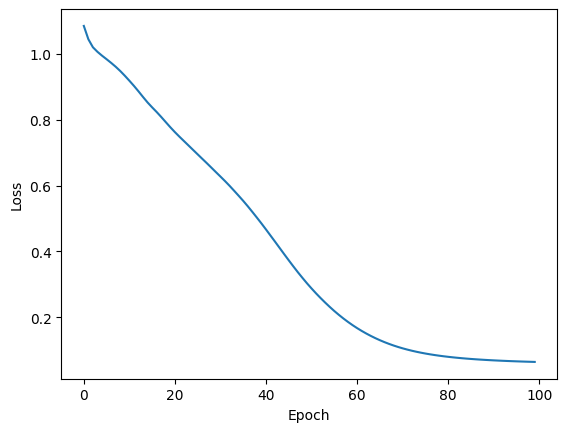

In [21]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [24]:
# Validate the model
with torch.no_grad(): #torch.inference_mode()
    y_val = model.forward(X_test)
    loss_val = loss_fn(y_val, y_test)

In [25]:
loss_val

tensor(0.0634)

In [32]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        
        if y_test[i] == 0:
            x = 'Setosa'
        elif y_test[i] == 1:
            x = 'Versicolor'
        else:
            x = 'Virginica'
            
        print(f'{i+1}) {str(y_val)} {x} {y_val.argmax().item()}')
        
        if y_val.argmax().item() == y_test[i]:
            correct += 1
    
print(f'We got {correct} correct!')

1) tensor([-1.4120,  6.3132,  2.6088]) Versicolor 1
2) tensor([ 8.4023,  2.4573, -7.5391]) Setosa 0
3) tensor([-12.1991,   1.1829,  13.7443]) Virginica 2
4) tensor([-1.6752,  5.9271,  2.8622]) Versicolor 1
5) tensor([-1.5887,  6.7559,  2.8371]) Versicolor 1
6) tensor([ 7.8451,  2.3289, -7.0010]) Setosa 0
7) tensor([ 1.1273,  6.0707, -0.0493]) Versicolor 1
8) tensor([-5.2088,  4.4484,  6.5316]) Virginica 2
9) tensor([-3.2614,  4.9128,  4.4788]) Versicolor 1
10) tensor([0.5683, 6.5565, 0.5445]) Versicolor 1
11) tensor([-4.3492,  4.7780,  5.6344]) Virginica 2
12) tensor([ 7.3631,  2.0552, -6.5497]) Setosa 0
13) tensor([ 8.1384,  2.3552, -7.2879]) Setosa 0
14) tensor([ 7.4936,  2.1057, -6.6740]) Setosa 0
15) tensor([ 7.8643,  2.2491, -7.0269]) Setosa 0
16) tensor([-1.3322,  6.5325,  2.5448]) Versicolor 1
17) tensor([-8.2712,  2.4244,  9.6406]) Virginica 2
18) tensor([0.3374, 6.4826, 0.7657]) Versicolor 1
19) tensor([-1.5909,  5.7677,  2.7565]) Versicolor 1
20) tensor([-8.1891,  2.2739,  9.

In [35]:
new_data = torch.tensor([5.9 ,3.0, 5.1, 1.8])

In [37]:
with torch.no_grad():
    prid = model(new_data)
    print(prid)
    cat = prid.argmax().item()
    
    if cat == 0:
        print('Setosa')
    elif cat == 1:
        print('Versicolor')
    else:
        print('Virginica')
    
    

tensor([-4.9424,  3.9152,  6.1960])
Virginica


In [38]:
#save and load the model

torch.save(model.state_dict(), 'my_iris_model.pt')


In [39]:
#load the model
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

/var/folders/xj/qcr1qx611v7g5229tpds19x80000gn/T/ipykernel_80265/2020246995.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris

<All keys matched successfully>

In [40]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)